In [1]:
from histimator.models import HistiModel, HistiChannel, HistiSample
from histimator.estimator import BinnedLH

In [2]:
from iminuit import Minuit, describe
import numpy as np

In [3]:
hist_sig = np.asarray([1,2,3,4])
hist_bkg = np.asarray([5,5,5,5])

In [4]:
m = HistiModel('model')
signal = HistiSample('signal')
binedges = [0,1,2,3,4]
signal.SetHisto((hist_sig,binedges))
signal.AddNorm("SigXSecOverSM",1.0,0,3)

In [5]:
background = HistiSample('background')
background.SetHisto((hist_bkg, binedges))
background.AddNorm("BackgroundNorm",1.,0,100)

In [6]:
print describe(background.pdf)

['x', 'BackgroundNorm']


In [7]:
print background.bincontent
assess = []
for i in range(len(background.binedges)):
    assess.append(background.pdf(i,1))
print assess

[5 5 5 5]
[5.0, 5.0, 5.0, 5.0, 0.0]


In [8]:
chan = HistiChannel("SR")
chan.AddSample(signal)
chan.AddSample(background)

In [9]:
data = hist_sig*2 +hist_bkg

chan.SetData(data)
m.AddChannel(chan)

In [10]:
blh = BinnedLH(m, bound=(0,4))

In [11]:
params = m.Parameters()
print "params are ",params

params are  {'BackgroundNorm': 1.0, 'limit_SigXSecOverSM': (0, 3), 'SigXSecOverSM': 1.0, 'limit_BackgroundNorm': (0, 100), 'errordef': 1}


In [12]:
minimiser = Minuit(blh, **params)

/Users/vince/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:1: InitialParamWarning: Parameter SigXSecOverSM is floating but does not have initial step size. Assume 1.
  """Entry point for launching an IPython kernel.
/Users/vince/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:1: InitialParamWarning: Parameter BackgroundNorm is floating but does not have initial step size. Assume 1.
  """Entry point for launching an IPython kernel.


In [13]:
minimiser.migrad()
minimiser.hesse()
minimiser.minos()

FCN = 8.26387865588 
 TOTAL NCALL = 43 
 NCALLS = 43 
 
 
 EDM = 2.92948620048e-09 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,SigXSecOverSM,1.99991,2.39958,0,0,0.0,3.0,
2,BackgroundNorm,1.00003,0.979392,0,0,0.0,100.0,


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,SigXSecOverSM,1.99991,2.39925,0,0,0.0,3.0,
2,BackgroundNorm,1.00003,0.978772,0,0,0.0,100.0,


+,SigXSecOverSM,BackgroundNorm
SigXSecOverSM,1.00,-0.90
BackgroundNorm,-0.90,1.00


Error,-1.98618855801,1.0000906787
Valid,True,True
At Limit,False,True
Max FCN,False,False
New Min,False,False


Error,-0.756705474884,1.08484159153
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


{'BackgroundNorm': {'lower_new_min': False, 'upper': 1.0848415915291094, 'lower': -0.7567054748839628, 'at_lower_limit': False, 'min': 1.0000282677554428, 'at_lower_max_fcn': False, 'is_valid': True, 'upper_new_min': False, 'at_upper_limit': False, 'lower_valid': True, 'upper_valid': True, 'at_upper_max_fcn': False, 'nfcn': 82},
 'SigXSecOverSM': {'lower_new_min': False, 'upper': 1.0000906787035424, 'lower': -1.9861885580130567, 'at_lower_limit': False, 'min': 1.9999093212964576, 'at_lower_max_fcn': False, 'is_valid': True, 'upper_new_min': False, 'at_upper_limit': True, 'lower_valid': True, 'upper_valid': True, 'at_upper_max_fcn': False, 'nfcn': 53}}

/Users/vince/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     SigXSecOverSM = -2.798597
    BackgroundNorm = +1.000028

  
/Users/vince/tensorflow/lib/python2.7/site-packages/scipy/stats/_discrete_distns.py:462: RuntimeWarning: invalid value encountered in greater_equal
  return mu >= 0
/Users/vince/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     SigXSecOverSM = -2.798597
    BackgroundNorm = nan

  
/Users/vince/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     SigXSecOverSM = -2.467665
    BackgroundNorm = +1.000028

  
/Users/vince/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
     SigXSecOverSM = -2.467665
    BackgroundNo

(array([-2.79859656, -2.46766512, -2.13673368, -1.80580224, -1.4748708 ,
        -1.14393936, -0.81300792, -0.48207648, -0.15114504,  0.1797864 ,
         0.51071784,  0.84164928,  1.17258072,  1.50351216,  1.8344436 ,
         2.16537504,  2.49630648,  2.82723792,  3.15816936,  3.4891008 ,
         3.82003224,  4.15096368,  4.48189512,  4.81282656,  5.143758  ,
         5.47468944,  5.80562088,  6.13655232,  6.46748376,  6.7984152 ]),
 array([         nan,          nan,          nan,          nan,
                 nan,  10.72445367,  10.24510163,   9.81472351,
          9.43460929,   9.10597749,   8.82996365,   8.60760593,
          8.43982069,   8.32739539,   8.27096054,   8.27095718,
          8.32762813,   8.4410161 ,   8.6109078 ,   8.83685199,
          9.11815041,   9.4538878 ,   9.8428623 ,  10.31346051,
         10.96279648,  11.77804653,  12.73972124,  13.83157435,
         15.03992668,  16.35314499]),
 array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
   

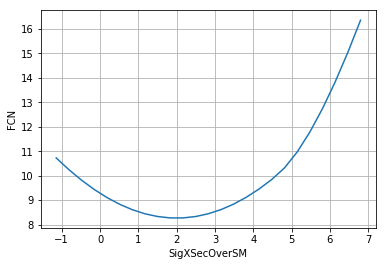

In [14]:
%matplotlib inline
minimiser.draw_mnprofile('SigXSecOverSM')

## Testing PDF

In [15]:
m2 = HistiModel('newmodel')
signal = HistiSample('signal')
binedges = [0,1,2,3,4]
signal.SetHisto((hist_sig,binedges))
signal.AddNorm("SigXSecOverSM",1.0,0,3)
background = HistiSample('background')
background.SetHisto((hist_bkg, binedges))
background.AddNorm("BackgroundNorm",1.,0,100)

In [16]:
background.AddOverallSys("NormSystUncertainty",.9,1.2)

adding np NormSystUncertainty {'nom': 0.29999999999999993, 'range': (0, 100)}


In [17]:
from iminuit import describe
describe(background.pdf)

['x', 'BackgroundNorm', 'NormSystUncertainty']

In [18]:
print background.bincontent
assess = []
for i in range(len(background.bincontent)):
    assess.append(background.pdf(i,1,-1))
print assess

[5 5 5 5]
[4.5, 4.5, 4.5, 4.5]


In [19]:
chan = HistiChannel("SR")
chan.AddSample(signal)
chan.AddSample(background)

data = hist_sig*2 +hist_bkg

chan.SetData(data)
m2.AddChannel(chan)

In [20]:
blh = BinnedLH(m2, bound=(0,4))
params = m2.Parameters()
print "params are ",params

params are  {'BackgroundNorm': 1.0, 'limit_SigXSecOverSM': (0, 3), 'NormSystUncertainty': 0.29999999999999993, 'SigXSecOverSM': 1.0, 'errordef': 1, 'limit_NormSystUncertainty': (0, 100), 'limit_BackgroundNorm': (0, 100)}


In [23]:
minimiser = Minuit(blh, **params)
minimiser.migrad()
minimiser.hesse()
minimiser.minos()

/Users/vince/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:1: InitialParamWarning: Parameter SigXSecOverSM is floating but does not have initial step size. Assume 1.
  """Entry point for launching an IPython kernel.
/Users/vince/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:1: InitialParamWarning: Parameter BackgroundNorm is floating but does not have initial step size. Assume 1.
  """Entry point for launching an IPython kernel.
/Users/vince/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:1: InitialParamWarning: Parameter NormSystUncertainty is floating but does not have initial step size. Assume 1.
  """Entry point for launching an IPython kernel.


FCN = 8.2638824355 
 TOTAL NCALL = 84 
 NCALLS = 84 
 
 
 EDM = 3.77594067301e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 False 
 False 
 True 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,SigXSecOverSM,2.00054,2.3922,0,0,0.0,3.0,
2,BackgroundNorm,0.799819,6.47199,0,0,0.0,100.0,
3,NormSystUncertainty,1.22841,96.4013,0,0,0.0,100.0,


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,SigXSecOverSM,2.00054,2.39139,0,0,0.0,3.0,
2,BackgroundNorm,0.799819,6.47215,0,0,0.0,100.0,
3,NormSystUncertainty,1.22841,96.4046,0,0,0.0,100.0,


+,SigXSecOverSM,BackgroundNorm,NormSystUncertainty
SigXSecOverSM,1.00,-0.08,-0.07
BackgroundNorm,-0.08,1.00,-0.99
NormSystUncertainty,-0.07,-0.99,1.00


Error,-1.98682904578,0.99946044272
Valid,True,True
At Limit,False,True
Max FCN,False,False
New Min,False,False


/Users/vince/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
          SigXSecOverSM = +2.155716
         BackgroundNorm = -5.672173
    NormSystUncertainty = +99.799445

  after removing the cwd from sys.path.
/Users/vince/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
          SigXSecOverSM = nan
         BackgroundNorm = -5.672173
    NormSystUncertainty = +99.799445

  after removing the cwd from sys.path.
/Users/vince/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
          SigXSecOverSM = +2.155716
         BackgroundNorm = -5.672173
    NormSystUncertainty = nan

  after removing the cwd from sys.path.
/Users/vince/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: fcn returns Nan
fcn is 

Error,-6.47199261342,1.28505345514
Valid,False,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


/Users/vince/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
          SigXSecOverSM = +2.000005
         BackgroundNorm = +0.999998
    NormSystUncertainty = nan

  after removing the cwd from sys.path.
/Users/vince/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
          SigXSecOverSM = nan
         BackgroundNorm = +0.999998
    NormSystUncertainty = nan

  after removing the cwd from sys.path.
/Users/vince/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
          SigXSecOverSM = +2.000005
         BackgroundNorm = nan
    NormSystUncertainty = nan

  after removing the cwd from sys.path.
/Users/vince/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: fcn returns Nan
fcn is called with followin

Error,-96.401318463,96.401318463
Valid,False,False
At Limit,False,False
Max FCN,False,False
New Min,False,False


{'BackgroundNorm': {'lower_new_min': False, 'upper': 1.2850534551399213, 'lower': -6.471992613415495, 'at_lower_limit': False, 'min': 0.7998192198639564, 'at_lower_max_fcn': False, 'is_valid': False, 'upper_new_min': False, 'at_upper_limit': False, 'lower_valid': False, 'upper_valid': True, 'at_upper_max_fcn': False, 'nfcn': 681},
 'NormSystUncertainty': {'lower_new_min': False, 'upper': 96.40131846303623, 'lower': -96.40131846303623, 'at_lower_limit': False, 'min': 1.22841284966273, 'at_lower_max_fcn': False, 'is_valid': False, 'upper_new_min': False, 'at_upper_limit': False, 'lower_valid': False, 'upper_valid': False, 'at_upper_max_fcn': False, 'nfcn': 1322},
 'SigXSecOverSM': {'lower_new_min': False, 'upper': 0.9994604427201406, 'lower': -1.9868290457762117, 'at_lower_limit': False, 'min': 2.0005395572798594, 'at_lower_max_fcn': False, 'is_valid': True, 'upper_new_min': False, 'at_upper_limit': True, 'lower_valid': True, 'upper_valid': True, 'at_upper_max_fcn': False, 'nfcn': 112}}

/Users/vince/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: Specify nsigma bound but error but error matrix is not accurate.
  """Entry point for launching an IPython kernel.
/Users/vince/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
          SigXSecOverSM = -2.783865
         BackgroundNorm = +0.799819
    NormSystUncertainty = +1.228413

  """Entry point for launching an IPython kernel.
/Users/vince/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
          SigXSecOverSM = -2.783865
         BackgroundNorm = nan
    NormSystUncertainty = +1.228413

  """Entry point for launching an IPython kernel.
/Users/vince/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
          SigXSecOverSM = -2.783865


(array([-2.78386487, -2.45390595, -2.12394702, -1.7939881 , -1.46402917,
        -1.13407024, -0.80411132, -0.47415239, -0.14419346,  0.18576546,
         0.51572439,  0.84568332,  1.17564224,  1.50560117,  1.83556009,
         2.16551902,  2.49547795,  2.82543687,  3.1553958 ,  3.48535473,
         3.81531365,  4.14527258,  4.4752315 ,  4.80519043,  5.13514936,
         5.46510828,  5.79506721,  6.12502614,  6.45498506,  6.78494399]),
 array([         nan,          nan,          nan,          nan,
                 nan,  10.70946137,  10.23291437,   9.80502959,
          9.42717262,   9.10052047,   8.82619745,   8.60522912,
          8.43852573,   8.32686286,   8.27086083,   8.27097028,
          8.32746788,   8.44024578,   8.60933111,   8.83398449,
          9.11375502,   9.44765187,   9.83450983,  10.30061488,
         10.94371087,  11.75229946,  12.70707906,  13.79153292,
         14.99231626,  16.29777241]),
 array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
   

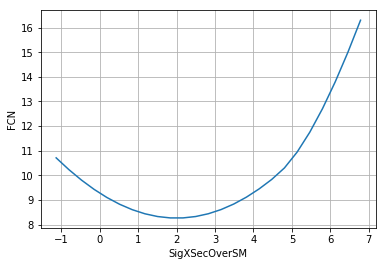

In [22]:
minimiser.draw_mnprofile('SigXSecOverSM')